In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
x = np.load('x.npy')

In [23]:
import tensorflow as tf
import gin

In [24]:
mol = gin.i_o.from_smiles.to_mol('CC')
mol = gin.deterministic.hydrogen.add_hydrogen(mol)

tf.Tensor(
[[[ 0.         -0.09636337  0.06042605]
  [ 0.          0.          0.11881002]]

 [[ 0.         -0.09636337  0.06042605]
  [ 0.05886328 -0.03445607  0.09633331]]

 [[ 0.         -0.09636337  0.06042605]
  [ 0.10631713 -0.07480136  0.09751408]]

 [[ 0.         -0.09636337  0.06042605]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.11881002]
  [ 0.07462295 -0.07839277  0.13587214]]

 [[ 0.          0.          0.11881002]
  [ 0.10707366 -0.03049735  0.07979822]]

 [[ 0.          0.          0.11881002]
  [ 0.09463968 -0.02627378  0.09093315]]], shape=(7, 2, 3), dtype=float32)


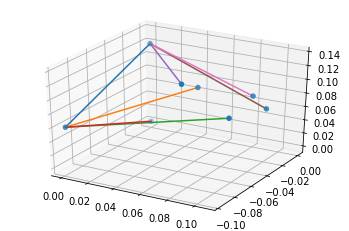

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
idx = 6
ax.scatter(x[idx, :, 0], x[idx, :, 1], x[idx, :, 2])

bond_idxs = tf.where(
    tf.greater(
        mol[1],
        tf.constant(0, dtype=tf.float32)))

bond_xyz = tf.gather(
    x[idx],
    bond_idxs)


for bond_idx in range(tf.shape(bond_xyz)[0]):
    ax.plot(
        np.linspace(
            bond_xyz[bond_idx, 0, :],
            bond_xyz[bond_idx, 1, :])[:, 0],
        np.linspace(
            bond_xyz[bond_idx, 0, :],
            bond_xyz[bond_idx, 1, :])[:, 1],
        np.linspace(
            bond_xyz[bond_idx, 0, :],
            bond_xyz[bond_idx, 1, :])[:, 2],
            )

print(bond_xyz)

In [7]:
bond_idxs, angle_idxs, torsion_idxs, one_four_idxs, nonbonded_idxs = gin.deterministic.mm.indices.get_idxs(
    mol[1])

In [10]:
gin.deterministic.mm.geometry.get_angles(angle_idxs, x)

<tf.Tensor: id=1884, shape=(64, 12), dtype=float32, numpy=
array([[0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.7121389 , 1.0994735 , 1.7096387 , 1.7775483 ,
        0.57305884, 1.2448659 ],
       [0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.7121389 , 1.0994735 , 1.7096387 , 1.7775483 ,
        0.57305884, 1.2448659 ],
       [0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.7121389 , 1.0994735 , 1.7096387 , 1.7775483 ,
        0.57305884, 1.2448659 ],
       [0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.7121389 , 1.0994735 , 1.7096387 , 1.7775483 ,
        0.57305884, 1.2448659 ],
       [0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.7121389 , 1.0994735 , 1.7096387 , 1.7775483 ,
        0.57305884, 1.2448659 ],
       [0.6165153 , 1.4743702 , 0.857929  , 1.7067001 , 1.7012434 ,
        1.6037292 , 1.712138